In [3]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/GRG.L.csv")

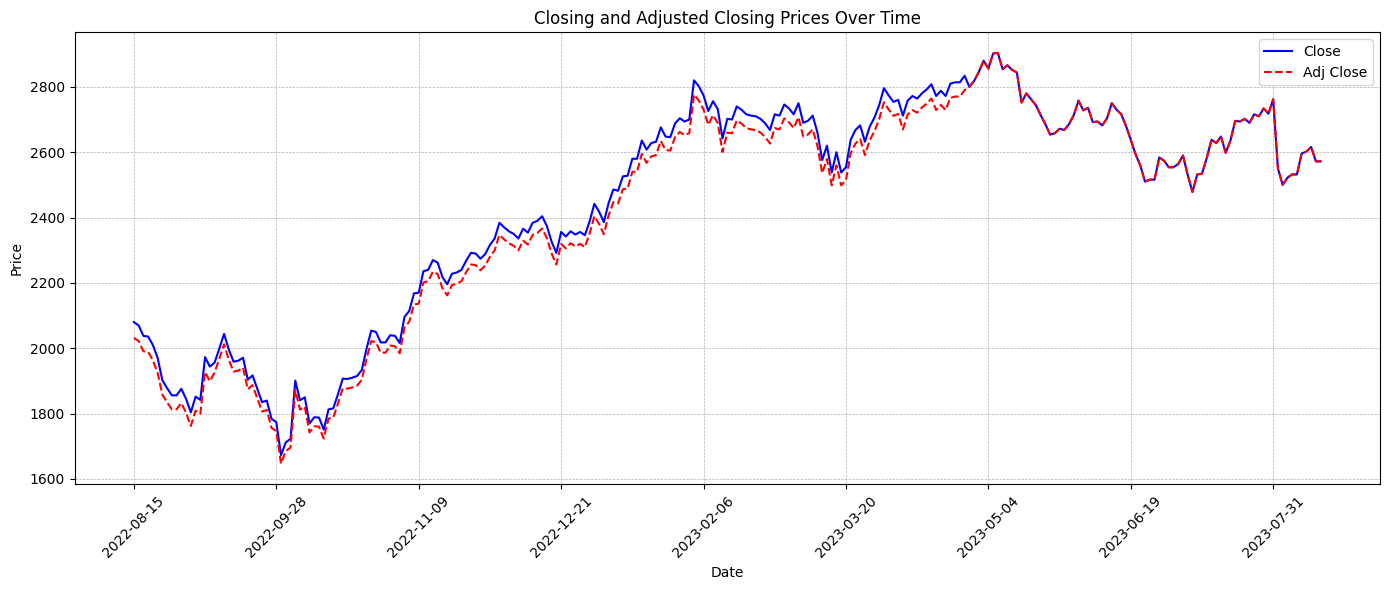

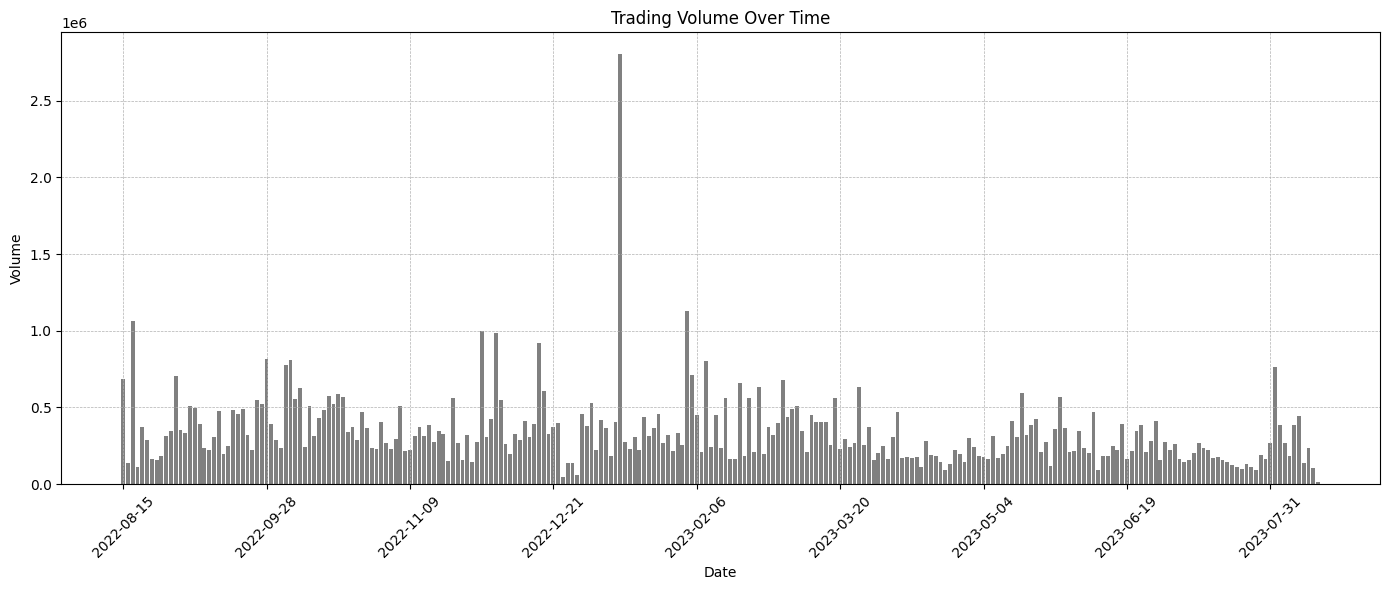

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
               Open         High          Low        Close    Adj Close  \
 count   251.000000   251.000000   251.000000   251.000000   251.000000   
 mean   2439.964143  2471.390160  2407.761302  2441.609443  2415.101095   
 std     337.277362   332.925858   336.298662   335.084467   340.522488   
 min    1660.000000  1732.000000  1650.000000  1673.000000  1647.025391   
 25%    2203.000000  2236.000000  2170.062988  2223.000000  2188.486328   
 50%    2574.000000  2604.000000  2525.610107  2572.000000  2559.633057   
 75%    2710.000000  2740.000000  2680.000000  2711.000000  2686.807373   
 max    2914.000000  2914.000000  2856.000000  2904.000000  2904.000000   
 
              Volume  
 count  2.510000e+02  
 mean   3.410641e+05  
 std    2.417917e+05  
 min    1.679900e+04  
 25%    1.998030e+05  
 50%    2.902700e+05  
 75%    4.102025e+05  
 max    2.80

In [5]:
import matplotlib.pyplot as plt

# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Generate summary statistics
summary_stats = data.describe()

# 3. Plot the closing and adjusted closing prices over time
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close', color='blue')
plt.plot(data['Date'], data['Adj Close'], label='Adj Close', color='red', linestyle='--')
plt.title('Closing and Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(data['Date'][::30], rotation=45)  # Display every 30th date for clarity
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# 4. Plot the trading volume over time
plt.figure(figsize=(14, 6))
plt.bar(data['Date'], data['Volume'], color='gray')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(data['Date'][::30], rotation=45)  # Display every 30th date for clarity
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

missing_values, summary_stats


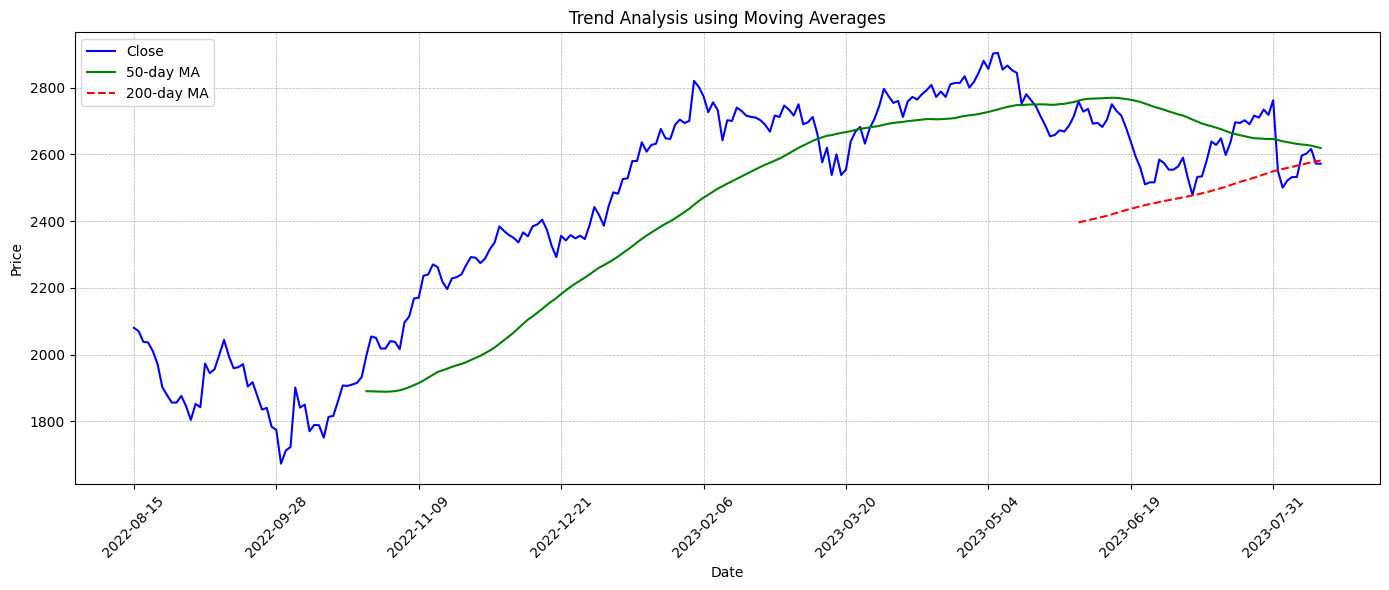

In [6]:
# 1. Trend Analysis using Moving Averages

# Calculate 50-day and 200-day moving averages
data['50-day MA'] = data['Close'].rolling(window=50).mean()
data['200-day MA'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close', color='blue')
plt.plot(data['Date'], data['50-day MA'], label='50-day MA', color='green')
plt.plot(data['Date'], data['200-day MA'], label='200-day MA', color='red', linestyle='--')
plt.title('Trend Analysis using Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(data['Date'][::30], rotation=45)  # Display every 30th date for clarity
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


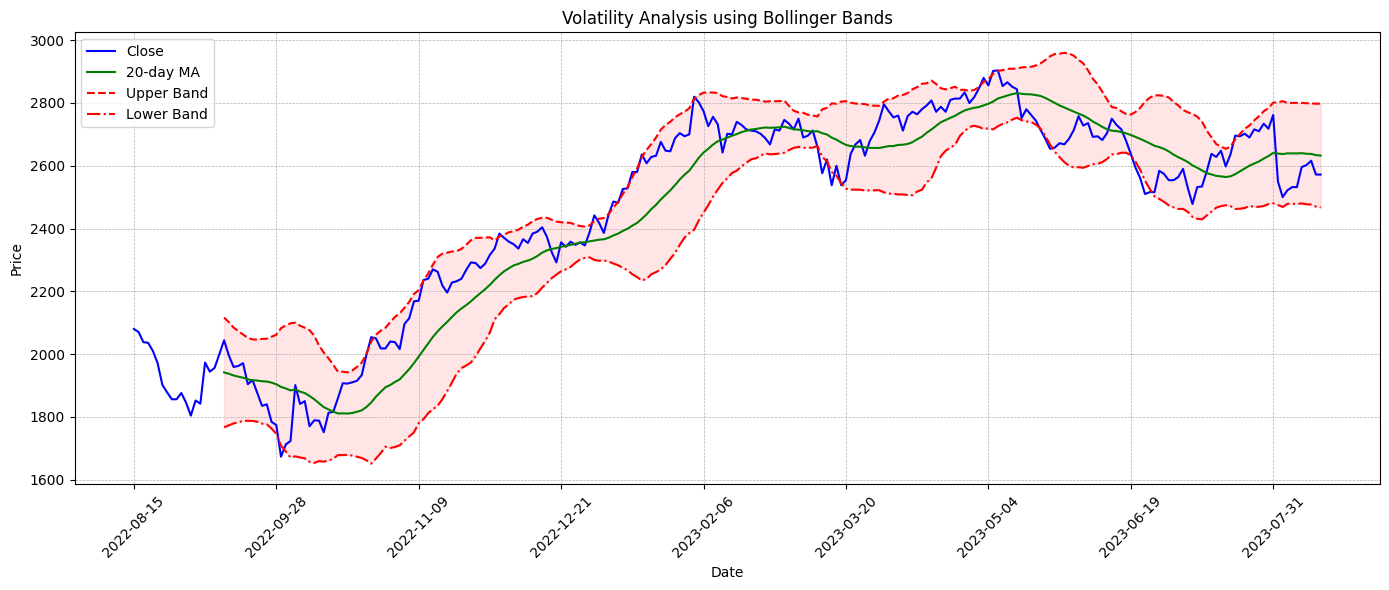

In [7]:
# 2. Volatility Analysis using Bollinger Bands

# Calculate the 20-day moving average (middle band)
data['20-day MA'] = data['Close'].rolling(window=20).mean()

# Calculate the upper and lower Bollinger Bands
data['Upper Band'] = data['20-day MA'] + 2*data['Close'].rolling(window=20).std()
data['Lower Band'] = data['20-day MA'] - 2*data['Close'].rolling(window=20).std()

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close', color='blue')
plt.plot(data['Date'], data['20-day MA'], label='20-day MA', color='green')
plt.plot(data['Date'], data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data['Date'], data['Lower Band'], label='Lower Band', color='red', linestyle='-.')
plt.fill_between(data['Date'], data['Upper Band'], data['Lower Band'], color='red', alpha=0.1)
plt.title('Volatility Analysis using Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(data['Date'][::30], rotation=45)  # Display every 30th date for clarity
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


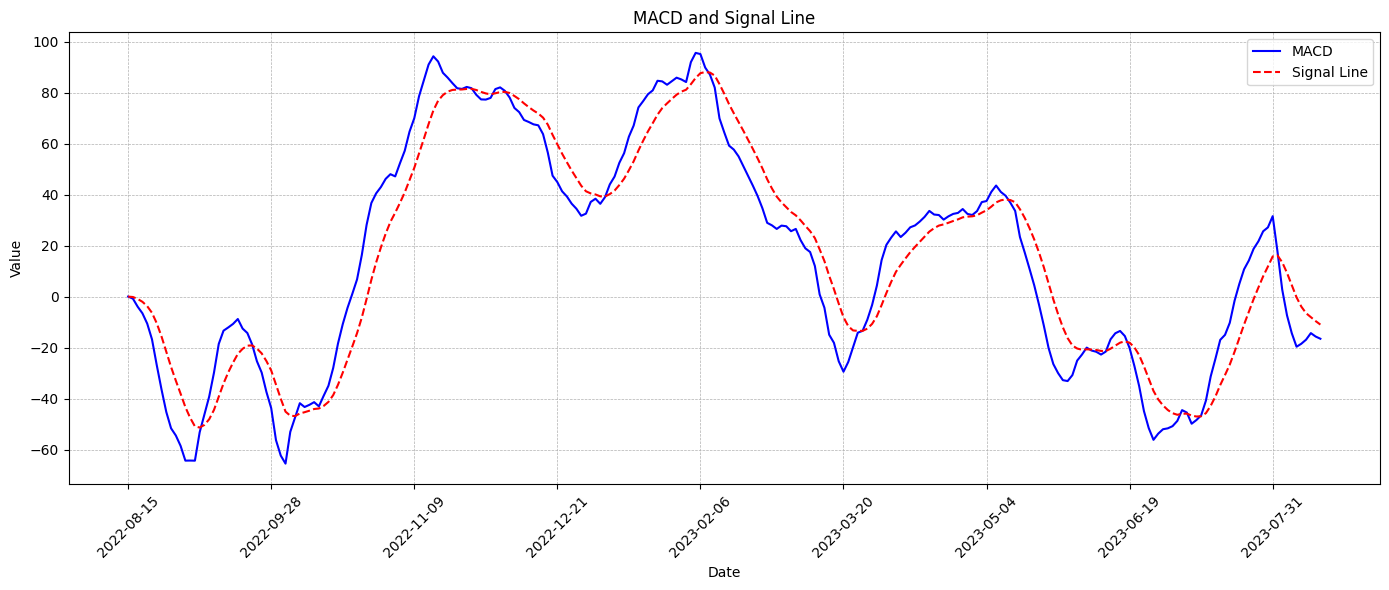

In [8]:
# Calculating MACD and Signal Line

# Short term moving average (12-day exponential moving average)
short_EMA = data['Close'].ewm(span=12, adjust=False).mean()

# Long term moving average (26-day exponential moving average)
long_EMA = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD
data['MACD'] = short_EMA - long_EMA

# Calculate Signal Line (9-day exponential moving average of MACD)
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plotting MACD and Signal Line
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['Date'], data['Signal Line'], label='Signal Line', color='red', linestyle='--')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(data['Date'][::30], rotation=45)  # Display every 30th date for clarity
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [9]:
# Identifying potential buy signals based on technical indicators

# 1. MACD Crossover Buy Signal: When MACD crosses above the Signal Line
data['MACD Buy Signal'] = (data['MACD'] > data['Signal Line']) & (data['MACD'].shift(1) <= data['Signal Line'].shift(1))

# 2. Bollinger Bands Buy Signal: When stock price touches or goes below the lower Bollinger Band and then rebounds
data['BB Buy Signal'] = (data['Close'] > data['Lower Band']) & (data['Close'].shift(1) <= data['Lower Band'].shift(1))

# 3. Golden Cross: When 50-day MA crosses above the 200-day MA
data['Golden Cross'] = (data['50-day MA'] > data['200-day MA']) & (data['50-day MA'].shift(1) <= data['200-day MA'].shift(1))

# Extracting recent buy signals
recent_buy_signals = data[data['Date'] > data['Date'].iloc[-100]]  # Considering last 100 days for recent signals
recent_buy_signals = recent_buy_signals[['Date', 'MACD Buy Signal', 'BB Buy Signal', 'Golden Cross']]
recent_buy_signals = recent_buy_signals[(recent_buy_signals['MACD Buy Signal']) |
                                        (recent_buy_signals['BB Buy Signal']) |
                                        (recent_buy_signals['Golden Cross'])]

recent_buy_signals


,Date,MACD Buy Signal,BB Buy Signal,Golden Cross
154,2023-03-24,True,False,False
194,2023-05-25,False,True,False
201,2023-06-06,True,False,False
206,2023-06-13,True,False,False
215,2023-06-26,False,True,False
221,2023-07-04,True,False,False
225,2023-07-10,True,False,False


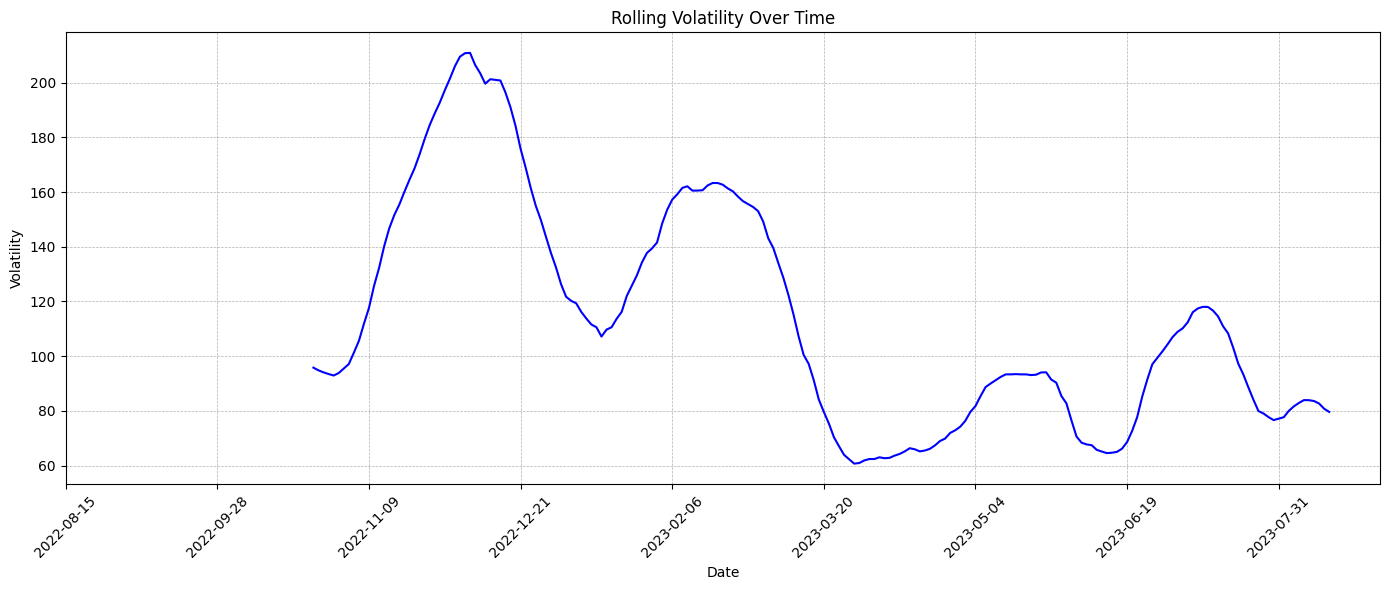

('2023-05-09', 2904.0, '2022-09-29', 1673.0)

In [10]:
# Historical Analysis

# Finding the date and value of the highest stock price
highest_price = data['Close'].max()
date_highest_price = data[data['Close'] == highest_price]['Date'].values[0]

# Finding the date and value of the lowest stock price
lowest_price = data['Close'].min()
date_lowest_price = data[data['Close'] == lowest_price]['Date'].values[0]

# Analyzing volatility: Calculate the rolling standard deviation as a measure of volatility
data['Rolling Volatility'] = data['Close'].rolling(window=50).std()

# Plotting the rolling volatility
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Rolling Volatility'], color='blue')
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(data['Date'][::30], rotation=45)  # Display every 30th date for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

date_highest_price, highest_price, date_lowest_price, lowest_price


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Data Preparation: Using past 'Close' prices to predict future prices
# We'll create a simple feature where we'll use the previous day's close price to predict the next day's close price

# Shift the 'Close' column to create the 'Previous Close' feature
data['Previous Close'] = data['Close'].shift(1)

# Drop NaN values created due to shifting
data = data.dropna()

# Features (X) and Target (y)
X = data[['Previous Close']]
y = data['Close']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation: Calculate Root Mean Squared Error (RMSE) for training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

rmse_train, rmse_test


(33.18266130921589, 68.57317355150168)

In [12]:
# Creating a DataFrame with actual and predicted values
predictions_df = pd.DataFrame({
    'Date': X_test.index,
    'Actual Close': y_test,
    'Predicted Close': y_pred_test
})

# Re-indexing by Date for better clarity
predictions_df = predictions_df.set_index('Date')

predictions_df.head()


,Actual Close,Predicted Close
Date,,
240,2762.0,2710.769358
241,2550.0,2750.827773
242,2500.0,2557.819048
243,2522.0,2512.298123
244,2532.0,2532.327330
